# El Riesgo según Daniel Bernoulli (1738)

Vamos a explorar las implicancias de las ideas de Daniel Bernoulli acerca del riesgo.

Es importante que entendamos *riesgo* más como sinónimo e *azar* (neutral) que de *peligroso*. Esto en sí da lugar a una interesante reflexión: *en esa época se hacía más énfasis en los aspectos negativos de destino que en los positivos; hoy usamos la palabra **suerte** como sinónimo de azar, con un sesgo claramente positivo*.

Por favor, sírvase de una [copia digital](https://www.semanticscholar.org/paper/Exposition-of-a-New-Theory-on-the-Measurement-of-Bernoulli/ef512f15aa1c294c7575aa329a7fecd80be6633b) de dicho documento histórico.

## §1

Dice Danielito:

> EVER SINCE mathematicians first began to study the measurement of risk there has been general agreement on the following proposition:
>
>  *Expected values are computed by multiplying each possible gain by the number of ways in which it can occur, and then dividing the sum of these products by the total number of possible cases where, in this theory, the consideration of cases which are all of the same probability is insisted upon.*
>
>  If this rule be accepted, what remains to be done within the framework of this theory amounts to the enumeration of all alterna-tives, their   breakdown into equi-probable cases and, finally, their insertion into corresponding classifications. 

### Ejemplo con una ruleta y una sola ficha

Hay 37 bolas numeradas del 0 al 36 y si sale tu número te agregan 35 fichas a la tuya; si no, te la sacan.

In [1]:
possible_futures = {35: 1, -1: 36} # gains: number_of_ways

In [2]:
sum(possible_futures.values())

37

In [3]:
def expected_value(possible_futures):
    return sum(number_of_ways * gain for gain, number_of_ways in possible_futures.items()) / sum(possible_futures.values())

In [4]:
expected_value(possible_futures)

-0.02702702702702703

Se podría decir, hablando mal y pronto, que por cada $\$100$ jugados, se pierden $\$3$. Entonces, según esta teoría que Danielito nos cuenta que goza de consenso entre los matemáticos que se han interesado por el problema de la medición del riesgo (eventualmente llamados economistas), el "valor" de decidir jugar $\$100$ a la ruleta, debe considerarse igual a $\$97$.

## §2

> Proper examination of the numerous demonstrations of this proposition that have come forth indicates that they all rest upon one hypothesis:
>
> *since there is no reason to assume that of two persons encountering identical risks, either should expect to have his desires more closely fulfilled, the risks anticipated by each must be deemed equal in value.*
>
> No characteristic of the persons themselves ought to be taken into consideration; only those matters should be weighed carefully that pertain to the terms of the risk. The relevant finding might then be made by the highest judges established by public authority. But really there is here no need for judgment but of deliberation, i.e .,  rules would be set up whereby anyone could estimate his prospects from any risky undertaking in light of one's specific financial circumstances. 

Hay **mucho** para desempaquetar:

* Bernoulli enuncia una crítica a sus contemporáneos devotos de la fe *Teoría del Valor Esperado*.
* Se los dice utilizando un clásico recurso de la riña de filósofos: encontrarle hipótesis implícitas al adversario, como si fueran piojos.
* BONUS POINTS: mostrar la aberración antinatural antihumana de las implicancias de esa hipótesis.
* Esa hipótesis básicamente dice, en castellano: ![since_the_is_no_reason](traductor_since_there_is_no_reason.png).
* Lo anterior es ABERRANTE, ANTINATURAL Y CONTRARIO A LA NATURALEZA HUMANA.
* O al menos es, cuestionable, nos dice Danielito.
* Después deduce que si para decidir participar en un "riesgo" (un negocio, un juego, pensiones, seguros, préstamos, etc.) no hace falta más que analizar sus términos, sin hacer entrar en consideración a las características de las personas involucradas en la decisión de "jugar juntas" o "firmar un contrato", **ENTONCES** no haría falta deliberación entre ellas para decidir si "cooperar" en un "contrato" pues se podría decidir siguiendo "reglas de cálculo" y comparando contra las circunstancias financieras particulares de cada una.
* Lo importante de esto es que es una crítica filosófica proto-liberal; a Bernoulli no le gusta la idea de que alguien pueda imponerle a todas las personas un "sistema de valoración de la incertidumbre".

## §3

En esta sección, Bernoulli nos ayudar a imaginar una situación en donde las reglas anteriores nos conducen a algo que para él no tiene sentido.

> To make this clear it is  perhaps advisable to consider the following example:
> 
> > Somehow a very poor fellow obtains a lottery ticket that will yield with equal probability either nothing or twenty thousand ducats. Will this man evaluate his chance of winning at ten thousand ducats? Would he not be ill-advised to sell this lottery ticket for nine thousand ducats?
>
> To me it seems that the answer is in the negative.

O sea, para Bernoulli, estaría bien aconsejarle al pobre que lo venda por $\$9000$.

In [5]:
possible_futures = {0: 0.5, 20000: 0.5} # gain: probability

In [6]:
expected_value(possible_futures)

10000.0

In [7]:
price = 9000

In [8]:
print(f'Acording to Expected Value Theory (EVT): any man should{" not " if price < expected_value(possible_futures) else " "}sell the ticket.')

Acording to Expected Value Theory (EVT): any man should not sell the ticket.


Pero a él le parece que es obvio que sí debería.

Es *vox populi*: *est avis in dextra, melior quam quattuor extra* (Ave en diestra, mejor que cuatro fuera).

Sabiduría popular: *más vale pájaro en mano que 100 volando*.

Para agregar énfasis, nos dice:

> On the other hand I  am inclined to believe that a rich man would be ill-advised to refuse to buy the lottery ticket for nine thousand ducats. If I am not wrong then it seems clear that all men cannot use the same rule to evaluate the gamble. The rule established in [§1](#§1) must, therefore, be discarded.

In [9]:
print(f'Acording to Expected Value Theory (EVT): any man should{" " if price < expected_value(possible_futures) else " not "}buy the ticket.')

Acording to Expected Value Theory (EVT): any man should buy the ticket.


Lo cuál es claramente contradictorio. A continuación, nos propone una enmienda:

> But anyone who considers the problem with perspicacity and interest will ascertain that the concept of value which we have used in this rule may be defined in a way which renders the entire procedure universally acceptable without reservation. To do this the determination of the value of an item must not be based on its price, but rather on the **utility** it yields. The price of the item is dependent only on the thing itself and is equal for everyone; the utility, however, is dependent on the particular circumstances of the person making the estimate. Thus there is no doubt that a gain of one thousand ducats is more significant to a  pauper than to a  rich man though both gain the same amount.

Y de esta manera, el concepto de **utilidad** hace su primera aparición en la Historia de la Economía. Danielito aquí nos da una lección magistral: _si la decisión de comprar o vender algo sólo dependiera de su precio, no habría nunca un intercambio económico; no existiría economía_.

Es para el evidente que una ganancia de 10000 ducats es más significante para un pobre que para un rico, por más que ambos ganen la misma cantidad.

No perdamos de vista el contexto histórico: faltaban todavía

In [10]:
f'{1776 - 1738} años'

'38 años'

para la publicación de *La Riqueza de las Naciones* de Adam Smith, obra que establece en Occidente al modelo de determinación de precios como equilibrio entre oferta y la demanda. [🐇꩜](https://en.wikipedia.org/wiki/Supply_and_demand#History).

Bernoulli es recordado como matemático, cuando en realidad deberíamos recordarlo como uno de los pioneros de las teorías económicas. Aquí no está ofreciendo un marco teórico para entender al objeto elemental de lo que hoy conocemos como **MICRO** economía: las interacciones financieras entre individuos, a partir de las cuales se forman grupos que a su vez interactúan financieramente con otros grupos y/o individuos.

Gracias a que distintas personas asignan distinto valor a un mismo objeto, es que existe la *liquidez* en un mercado. Bajo la idea de "valor=precio", nadie estaría dispuesto a intercambiar nada.

## §4

> The discussion has now been developed to a point where anyone may proceed with the investigation by the mere paraphrasing of one and the same principle. However, since the hypothesis is entirely new, it may nevertheless require some elucidation. I  have, therefore, decided to explain by example what I have explored.

Hay una distinción epistemológica importante para destacar:

* Bernoulli hace una crítica a la teoría anterior, señalando una hipótesis implícita que conduce a contradicciones lógicas y empíricas.
* Define la noción de *utilidad*, con el sólo objeto de distinguir *precio* y *valor*. Expande el lenguaje científico.}
* Le propone a la comunidad científica utilizar el siguiente **principio** para buscar teorías superadoras: *la decisión de aceptar una propuesta financiera tiene que depender explícitamente de la persona responsable (utilidad subjetiva de las pérdidas y ganancias) ADEMÁS de las características intrínsecas del contrato (costos y ganancias, con sus probabilidades)*.
* Es humilde al reconocer que lo que viene a continuación, es un ejemplo de lo que él ha explorado. No es una propuesta definitiva de teoría.


> Meanwhile, let us use this as a fundamental rule:
>
> _If the utility of each possible profit expectation is multiplied by the number of ways in which it can occur, and we then divide the sum of these products by the total number of possible cases, a mean utility [moral expectation] will be obtained, and the profit which corresponds to this utility will equal the value of the risk in question._

Aquí nos pide que, mientras no tengamos una teoría definitiva, aceptemos la siguiente regla y definición: *el valor de una proposición riesgosa será aquella ganancia o pérdida segura que tenga la misma utilidad que la "utilidad media" (expectativa **moral**) de todas las ganancias o pérdidas inciertas*.

Para entender esto, primero definamos la **moral expectation**:

In [11]:
def moral_expectation(possible_futures, utility):
    return sum(number_of_ways * utility(gain)
               for gain, number_of_ways in possible_futures.items()) / sum(possible_futures.values())

Luego pensemos que en términos físico-matemáticos, esto implica que dado que las utilidades, al ser subjetivas y medidas en una escala personal (ejemplo: "Fran valora al dulce de leche en 100 franes de felicidad"), son imposibles de comparar a menos que se las lleve a una escala común.

Bernoulli nos propone que esa escala sea el dinero. ¿Cómo realizar la transformación? Simple: $\mbox{utility}^{-1}(\mbox{moral_expectation})$.

In [67]:
def greedy_u(x):
    return (x/20000)**2

def inverse_greedy_u(u):
    return u**(1/2) * 20000

print(f'{(x := moral_expectation({0: 0.5, 20000: 0.5}, greedy_u)) = }')
print(f'{(value_of_the_risk := inverse_greedy_u(x)) = }')
print(f'{(z := moral_expectation({value_of_the_risk: 1}, greedy_u)) = }')
print(f'{z == x = }')

(x := moral_expectation({0: 0.5, 20000: 0.5}, greedy_u)) = 0.5
(value_of_the_risk := inverse_greedy_u(x)) = 15874.010519681995
(z := moral_expectation({value_of_the_risk: 1}, greedy_u)) = 0.5000000000000001
z == x = False


In [68]:
import matplotlib.pyplot as plt
import numpy as np

In [63]:
xs = np.linspace(0, 20000, 1000)

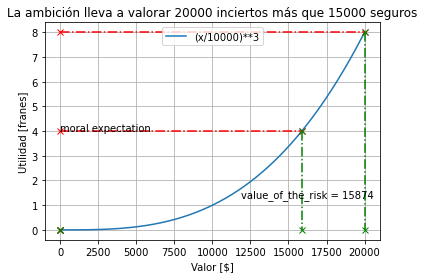

In [66]:
plt.plot(xs, np.vectorize(greedy_u)(xs), label = '(x/10000)**3')
#plt.plot(*([v, greedy_u(v)] for v in (0, 20000, value_of_the_risk)))
for g in (0, 20000, value_of_the_risk):
    plt.plot([0, g], [greedy_u(g)]*2, '-.x', color='red')
    plt.plot([g]*2, [greedy_u(g), 0], '-.x', color='green')
plt.text(0, x, 'moral expectation')
plt.text(value_of_the_risk*0.75, x/3, f'{value_of_the_risk = :0.0f}')
plt.title('La ambición lleva a valorar 20000 inciertos más que 15000 seguros')
plt.xlabel('Valor [$]')
plt.ylabel('Utilidad [franes]')
plt.legend()
plt.grid()

Segundo, entendamos la regla de decisión que nos propone:

In [65]:
def dani_recommends_selling(price, possible_futures, utility, inverse_u):
    value_of_risk = inverse_u(moral_expectation(possible_futures, utility))
    return price > value_of_risk

def dani_recommends_buying(price, possible_futures, utility, inverse_u):
    value_of_risk = inverse_u(moral_expectation(possible_futures, utility))
    return price < value_of_risk


Por ejemplo, podríamos re-expresar la teoría anterior (EVT) como un caso particular (EUT) de la nueva *(este es otro recurso típico de la riña entre filósofos: capturar la cosmología del adversario dentro de la propia)*:

In [191]:
def evt_utility(gain):
    return (utility := gain)

def inverse_evt_utility(utility):
    return (gain := utility)

In [232]:
dani_recommends_selling(9000, possible_futures, classical_utility, inverse_classical_utility)

False

In [233]:
dani_recommends_buying(9000, possible_futures, classical_utility, inverse_classical_utility)

True